In [ ]:
!unzip "/content/drive/MyDrive/splitted/data.zip" -d "/content/drive/MyDrive/splitted/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/splitted/data/flowers/magnolia/21986337916_36d1c95e64_c.jpg  
  inflating: /content/drive/MyDrive/splitted/data/flowers/magnolia/2294580412_50846f9130_c.jpg  
  inflating: /content/drive/MyDrive/splitted/data/flowers/magnolia/2300805045_982fa1bdf2_c.jpg  
  inflating: /content/drive/MyDrive/splitted/data/flowers/magnolia/2306786428_99f92b0d9c_c.jpg  
  inflating: /content/drive/MyDrive/splitted/data/flowers/magnolia/2324281515_c0269d5963_c.jpg  
  inflating: /content/drive/MyDrive/splitted/data/flowers/magnolia/2325102200_1cb9d8cabc_c.jpg  
  inflating: /content/drive/MyDrive/splitted/data/flowers/magnolia/2325102996_5f1e3bf13a_c.jpg  
  inflating: /content/drive/MyDrive/splitted/data/flowers/magnolia/2325370643_f452e88ace_c.jpg  
  inflating: /content/drive/MyDrive/splitted/data/flowers/magnolia/2334886646_c4c8ee532e_c.jpg  
  inflating: /content/drive/MyDrive/splitted/data/flowers/magnolia/23422365

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/RESEARCH INTERN DATASET/flowers'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
!pip install split-folders
import splitfolders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("/content/drive/MyDrive/data/flowers", output="/content/drive/MyDrive/data/dataset",
    seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False) # default values



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Copying files: 7282 files [02:53, 41.99 files/s]


In [ ]:
import keras

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import cv2
import os
import random
import tensorflow as tf
import numpy as np

In [ ]:
labels = ['astilbe', 'bellflower','black_eyed_susan','calendula','california_poppy','carnation','common_daisy','coreopsis','daffodil','dandelion','iris','magnolia','rose','sunflower','tulip','water_lily']
img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
data = get_data("/content/drive/MyDrive/splitted/data/flowers")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


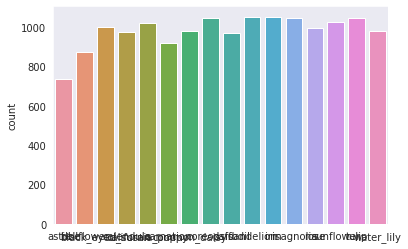

In [ ]:
l = []
for i in data:
    l.append(labels[i[1]])
sns.set_style('dark')
sns.countplot(l)

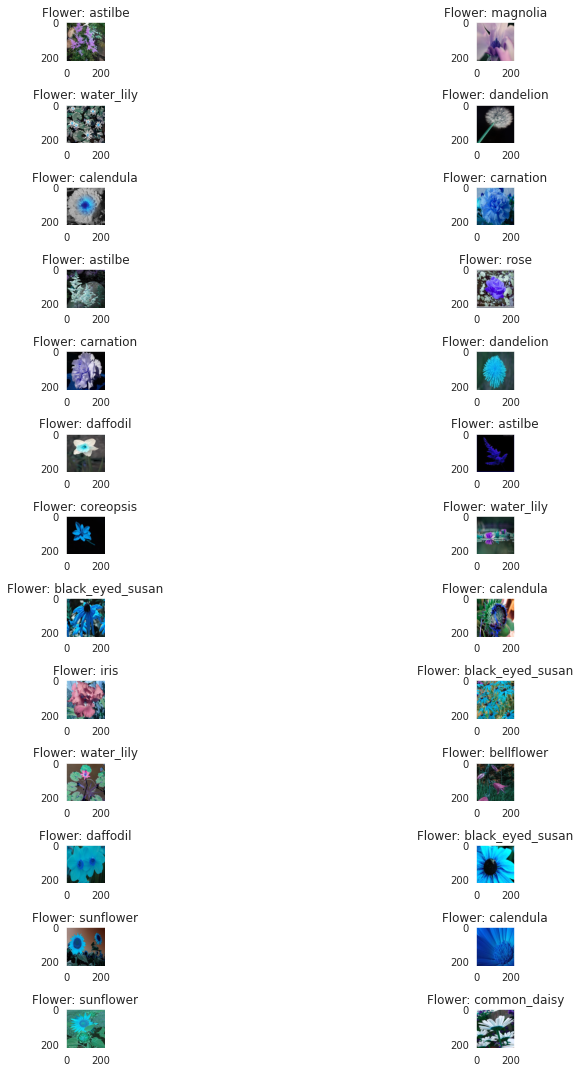

In [ ]:
fig,ax=plt.subplots(13,2)
fig.set_size_inches(15,15)
for i in range(13):
    for j in range (2):
        l=random.randint(0,len(data))
        ax[i,j].imshow(data[l][0])
        ax[i,j].set_title('Flower: '+labels[data[l][1]])
        
plt.tight_layout()

In [ ]:
x = []
y = []

for feature, label in data:
    x.append(feature)
    y.append(label)

In [ ]:
print(x[0:5])

[array([[[ 82, 142,  91],
        [106, 165, 114],
        [ 96, 154, 106],
        ...,
        [ 39, 113,  67],
        [ 37, 113,  65],
        [ 45, 124,  73]],

       [[ 87, 145,  94],
        [ 95, 154, 103],
        [ 85, 143,  95],
        ...,
        [ 50, 124,  77],
        [ 43, 120,  70],
        [ 26, 106,  54]],

       [[ 65, 122,  71],
        [ 84, 141,  91],
        [ 84, 139,  92],
        ...,
        [ 47, 121,  73],
        [ 41, 118,  67],
        [ 25, 105,  52]],

       ...,

       [[ 31, 101,  60],
        [ 12,  89,  47],
        [ 32, 118,  74],
        ...,
        [ 48, 116,  65],
        [ 21,  84,  38],
        [ 12,  71,  28]],

       [[ 26,  94,  55],
        [ 18,  93,  52],
        [ 36, 122,  78],
        ...,
        [ 35, 104,  56],
        [ 15,  78,  35],
        [  3,  63,  23]],

       [[ 23,  90,  51],
        [ 25,  99,  58],
        [ 42, 127,  84],
        ...,
        [ 30,  99,  53],
        [ 10,  73,  32],
        [  0,  53,  15]

In [ ]:
x=np.array(x)

In [ ]:
x = x.reshape(-1, img_size, img_size, 3)
y = np.array(y)


In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size = 0.2 , stratify = y , random_state = 0)

In [ ]:
try:
    # TPU detection. No parameters necessary if TPU_NAME environment variable is
    # set: this is always the case on Kaggle.
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    # Default distribution strategy in Tensorflow. Works on CPU and single GPU.
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

REPLICAS:  1


In [ ]:
from tensorflow.keras import applications
with strategy.scope():
    pre_trained_model = applications.EfficientNetV2L(input_shape=(224,224,3), include_top=False, weights="imagenet")

    for layer in pre_trained_model.layers[:19]:
        layer.trainable = False

    model = Sequential([
        pre_trained_model,
        MaxPool2D((2,2) , strides = 2),
        Flatten(),
        Dense(16 , activation='softmax')])
    model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001) , loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False) , metrics = ['accuracy'])
model.summary()

473186304/473176280 [==============================] - 7s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetv2-l (Functiona  (None, 7, 7, 1280)       117746848 
 l)                                                              
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 1280)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 11520)             0         
                                                                 
 dense (Dense)               (None, 16)                184336    
                                                                 
Total params: 117,931,184
Trainable params: 117,380,560
Non-trainable params: 550,624
___________________________________

In [ ]:
from keras_preprocessing.image.affine_transformations import random_rotation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
my_generator_train = ImageDataGenerator(rescale=1./255,horizontal_flip=True,rotation_range=180)
my_generator_test=ImageDataGenerator(rescale=1./255,horizontal_flip=True,rotation_range=180)
my_generator_val=ImageDataGenerator(rescale=1./255,horizontal_flip=True,rotation_range=180)

In [ ]:
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping

In [ ]:
model_path='/content/drive/MyDrive/splitted/model_test.h5'
callbacks = [
        ModelCheckpoint(model_path, verbose=1, save_best_only=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-7, verbose=1),
        #CSVLogger(csv_path),
        #TensorBoard(),
        #EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=False),
    ]


In [ ]:
my_generator_train=my_generator_train.flow_from_directory('/content/drive/MyDrive/splitted/train',target_size=(224,224),batch_size=16)
my_generator_test=my_generator_test.flow_from_directory('/content/drive/MyDrive/splitted/test',target_size=(224,224),batch_size=16,shuffle=False)
my_generator_val=my_generator_val.flow_from_directory('/content/drive/MyDrive/splitted/val',target_size=(224,224),batch_size=16)

Found 12586 images belonging to 16 classes.
Found 1587 images belonging to 16 classes.
Found 1567 images belonging to 16 classes.


In [ ]:
history = model.fit_generator(my_generator_train,  epochs = 20, validation_data=my_generator_val,callbacks=callbacks)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/20
787/787 [==============================] - ETA: 0s - loss: 0.6173 - accuracy: 0.8108
Epoch 1: val_loss improved from inf to 0.25350, saving model to /content/drive/MyDrive/splitted/model_test.h5
787/787 [==============================] - 4396s 6s/step - loss: 0.6173 - accuracy: 0.8108 - val_loss: 0.2535 - val_accuracy: 0.9221 - lr: 1.0000e-04
Epoch 2/20
787/787 [==============================] - ETA: 0s - loss: 0.2678 - accuracy: 0.9174
Epoch 2: val_loss improved from 0.25350 to 0.24111, saving model to /content/drive/MyDrive/splitted/model_test.h5
787/787 [==============================] - 631s 801ms/step - loss: 0.2678 - accuracy: 0.9174 - val_loss: 0.2411 - val_accuracy: 0.9317 - lr: 1.0000e-04
Epoch 3/20
787/787 [==============================] - ETA: 0s - loss: 0.1932 - accuracy: 0.9397
Epoch 3: val_loss improved from 0.24111 to 0.17428, saving model to /content/drive/MyDrive/splitted/model_test.h5
787/787 [==============================] - 631s 801ms/step - loss: 0.193

In [ ]:
pd.DataFrame(history.history).to_csv('/content/drive/MyDrive/splitted/efficient_train.csv')

In [ ]:
predictions = model.predict(my_generator_test)

In [ ]:

model.save('/content/drive/MyDrive/splitted/model_94.h5')

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/splitted/efficient_train.csv')

OSError: ignored

In [ ]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/splitted/model_test.h5')

In [ ]:
predictions=np.argmax(predictions,axis=1)

In [ ]:
predictions

array([ 0,  0,  0, ..., 15, 15, 15])

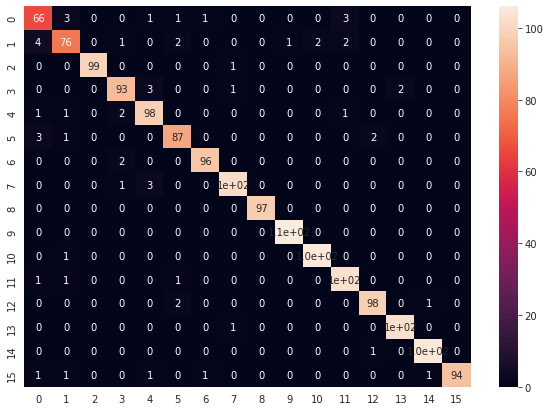

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_true=my_generator_test.classes,y_pred=predictions)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)


In [ ]:
np.sum(np.diag(cm))/np.sum(cm)

0.962822936357908

For 20 epochs accuracy is 96.28



np.sum(np.diag(cm))/np.sum(cm)

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

In [ ]:
def evaluation(history):
    # evaluation
    #-----------------------------------------------------------
    # Retrieve a list of list results on training and test data
    # sets for each training epoch
    #-----------------------------------------------------------
    acc      = history.history['accuracy']
    val_acc  = history.history['val_accuracy']
    loss     = history.history['loss']
    val_loss = history.history['val_loss']

    epochs   = range(len(acc)) # Get number of epochs

    #------------------------------------------------
    # Plot training and validation accuracy per epoch
    #------------------------------------------------
    plt.figure(figsize=(10,6))
    plt.plot  ( epochs,     acc )
    plt.plot  ( epochs, val_acc )
    plt.title ('Training and validation accuracy')
    plt.legend()
    #------------------------------------------------
    # Plot training and validation loss per epoch
    #------------------------------------------------
    plt.figure(figsize=(10,6))
    plt.plot  ( epochs,     loss )
    plt.plot  ( epochs, val_loss )
    plt.title ('Training and validation loss'   )

In [ ]:
precision_recall_fscore_support(my_generator_test.classes, predictions, average='macro')

(0.9608177528086452, 0.9603020784760955, 0.9604545773017319, None)

No handles with labels found to put in legend.


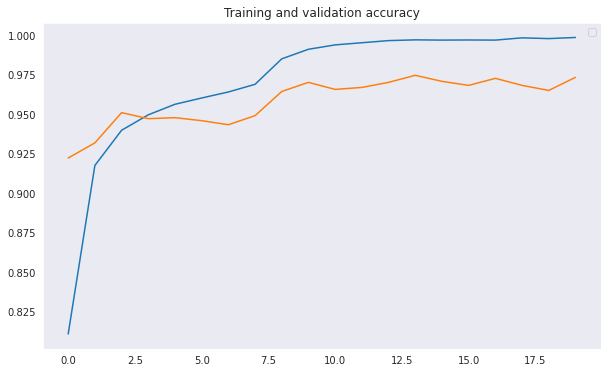

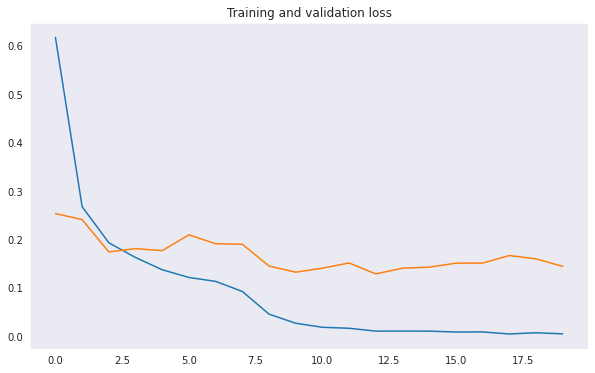

In [ ]:
evaluation(history)

In [ ]:
#plotting training values
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

NameError: ignored

In [ ]:
pd.read_csv('/content/drive/MyDrive/splitted/efficient_train.csv')

,Unnamed: 0,loss,accuracy,val_loss,val_accuracy,lr
0,0,0.617289,0.810822,0.253498,0.922144,0.000100
1,1,0.267774,0.917448,0.241106,0.931717,0.000100
2,2,0.193196,0.939695,0.174285,0.950862,0.000100
3,3,0.162696,0.949468,0.181031,0.947033,0.000100
4,4,0.137446,0.956142,0.176916,0.947671,0.000100
5,5,0.121539,0.960114,0.209602,0.945756,0.000100
6,6,0.113425,0.963928,0.191205,0.943204,0.000100
7,7,0.092604,0.968775,0.190076,0.948947,0.000100
8,8,0.045788,0.984904,0.145161,0.964263,0.000010
9,9,0.026923,0.990942,0.132453,0.970006,0.000010


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

headers = ['accuracy', 'val_accuracy']

df = pd.read_csv('/content/drive/MyDrive/splitted/efficient_train.csv', names=headers)

df.set_index('accuracy').plot()

plt.show()

TypeError: ignored